## Multivariable RNN

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Data preparation

In [30]:
csv_path = r'C:\Users\lenovo\Desktop\Session 4\LSTM-Multivariate_pollution.csv'

DF = pd.read_csv(csv_path)


In [31]:
df = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')

In [32]:
DF.shape

(43800, 9)

In [77]:
DF.columns

Index(['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',
       'snow', 'rain'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [24]:
df.describe()

,pollution,dew,temp,press,wnd_spd,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [33]:
DF.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [35]:
# OneHot Encodding
encoder = LabelEncoder()
df['wnd_dir'] = encoder.fit_transform(df['wnd_dir'])


In [36]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


In [37]:
# Normalization

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)


In [39]:
#  DataFrame 
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)

In [40]:
scaled_df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0
2010-01-02 01:00:00,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2010-01-02 02:00:00,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0
2010-01-02 03:00:00,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0
2010-01-02 04:00:00,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0


In [42]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, 0]  # Pollution column as output
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 24  #  Hour
X, y = create_sequences(scaled, SEQ_LENGTH)


### Construction and Training of RNN Model

In [45]:
## Data Split

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [69]:
print(f'X_train: {X_train.shape} \t, X_test: {X_test.shape}')

X_train: (35020, 24, 8) 	, X_test: (8756, 24, 8)


In [49]:
## Definition Model RNN by  GRU (Gated Recurrent Unit)

model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(SEQ_LENGTH, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [50]:
##  Model Training

Hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
876/876 [==============================] - 26s 24ms/step - loss: 0.0015 - val_loss: 5.5626e-04
Epoch 2/50
876/876 [==============================] - 22s 25ms/step - loss: 8.6722e-04 - val_loss: 5.0517e-04
Epoch 3/50
876/876 [==============================] - 19s 22ms/step - loss: 8.5924e-04 - val_loss: 4.8867e-04
Epoch 4/50
876/876 [==============================] - 19s 22ms/step - loss: 8.4047e-04 - val_loss: 4.9141e-04
Epoch 5/50
876/876 [==============================] - 19s 22ms/step - loss: 8.2964e-04 - val_loss: 6.9851e-04
Epoch 6/50
876/876 [==============================] - 21s 24ms/step - loss: 8.2758e-04 - val_loss: 5.9701e-04
Epoch 7/50
876/876 [==============================] - 19s 22ms/step - loss: 8.2589e-04 - val_loss: 5.0751e-04
Epoch 8/50
876/876 [==============================] - 20s 23ms/step - loss: 8.2029e-04 - val_loss: 4.7847e-04
Epoch 9/50
876/876 [==============================] - 21s 24ms/step - loss: 8.1317e-04 - val_loss: 5.1160e-04
Epoch 10/50
87

In [51]:
## Model Evaluation

loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


274/274 [==============================] - 3s 10ms/step - loss: 5.5242e-04
Test loss: 0.0005524224252440035


In [52]:
## Prediction Using Trained Model

y_pred = model.predict(X_test)


274/274 [==============================] - 3s 9ms/step


In [53]:
# Return Projected Data to Original Scale

y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled.shape[1] - 1))), axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled.shape[1] - 1))), axis=1))[:, 0]


In [56]:
## Calculation of evaluation Metric

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 545.8134124863565


####  MSE Being High:

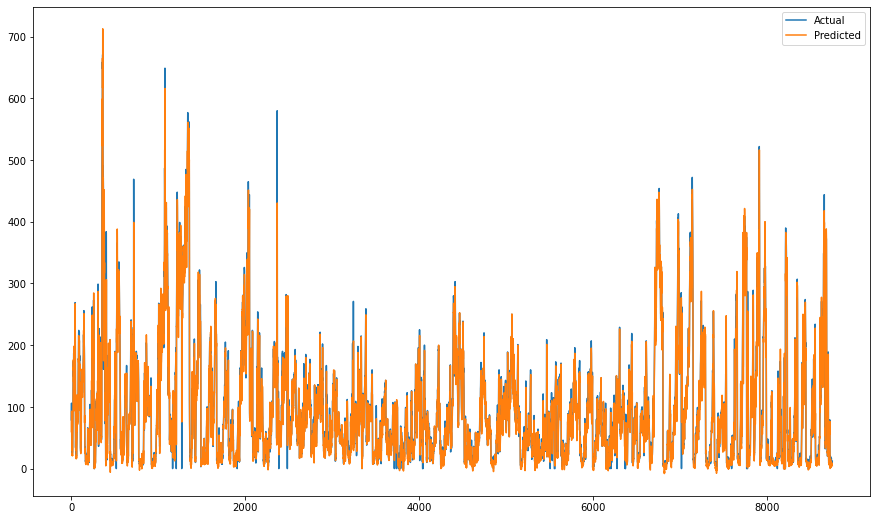

In [71]:
## Check Predicted and actual values

plt.figure(figsize=(15, 9))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()


### Examining the Amount of Learning and Overfitting

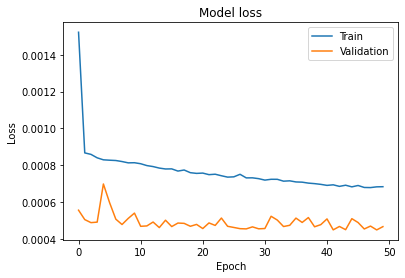

In [78]:
# Plot training & validation loss values
def plot_loss(Hist):
    plt.plot(Hist.history['loss'])
    plt.plot(Hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

plot_loss(Hist)

###  More optimization

In [62]:
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(SEQ_LENGTH, X.shape[2]), return_sequences=True))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [63]:
Hist2 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
876/876 [==============================] - 56s 56ms/step - loss: 0.0013 - val_loss: 5.1464e-04
Epoch 2/100
876/876 [==============================] - 44s 51ms/step - loss: 8.8042e-04 - val_loss: 4.8565e-04
Epoch 3/100
876/876 [==============================] - 42s 48ms/step - loss: 8.3396e-04 - val_loss: 4.9948e-04
Epoch 4/100
876/876 [==============================] - 42s 48ms/step - loss: 8.2705e-04 - val_loss: 5.0664e-04
Epoch 5/100
876/876 [==============================] - 43s 49ms/step - loss: 8.0998e-04 - val_loss: 4.5129e-04
Epoch 6/100
876/876 [==============================] - 42s 48ms/step - loss: 8.1807e-04 - val_loss: 4.6993e-04
Epoch 7/100
876/876 [==============================] - 44s 50ms/step - loss: 7.9659e-04 - val_loss: 4.8645e-04
Epoch 8/100
876/876 [==============================] - 45s 51ms/step - loss: 7.8399e-04 - val_loss: 5.4461e-04
Epoch 9/100
876/876 [==============================] - 45s 51ms/step - loss: 7.8161e-04 - val_loss: 4.4361e-04
Epoch

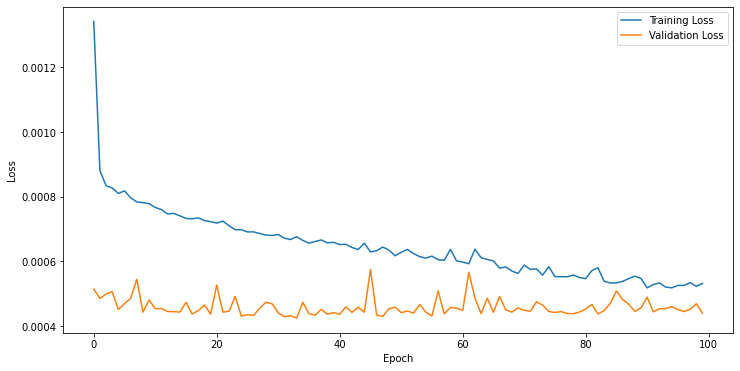

In [82]:
## Hist2

plt.figure(figsize=(12, 6))
plt.plot(Hist2.history['loss'], label='Training Loss')
plt.plot(Hist2.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
